In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('vader_lexicon', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [2]:
df = pd.read_csv('/Users/karangautam/Desktop/ppro/amazon/Electronics_extracted.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  350000 non-null  object 
 1   sentiment    350000 non-null  object 
 2   rating       350000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 8.0+ MB


In [4]:
df['sentiment'].value_counts()

sentiment
Positive    262500
Negative     52500
Neutral      35000
Name: count, dtype: int64

In [5]:
df.duplicated().sum()

27084

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isna().sum()

review_text    0
sentiment      0
rating         0
dtype: int64

In [8]:
df.shape

(322916, 3)

In [9]:
df.sample()

,review_text,sentiment,rating
189563,"very impressed being a south african customer,...",Positive,4.0


In [10]:
df['sentiment'].value_counts(normalize=True) * 100

sentiment
Positive    73.944927
Negative    15.802562
Neutral     10.252511
Name: proportion, dtype: float64

In [11]:
df.sample()

,review_text,sentiment,rating
319763,"very convenient lightweight, comfortable, and ...",Positive,4.0


In [12]:
df['rating'].skew()

-1.2325857679737806

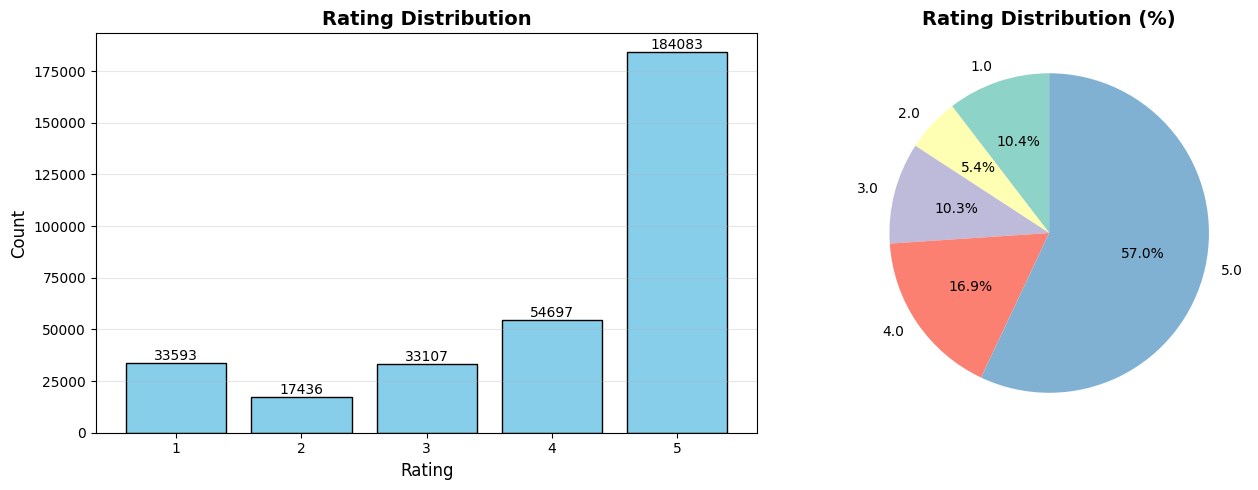


Rating Statistics:
count    322916.000000
mean          4.047458
std           1.350036
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


In [13]:
rating_counts = df['rating'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)


for i, (rating, count) in enumerate(zip(rating_counts.index, rating_counts.values)):
    axes[0].text(rating, count, str(count), ha='center', va='bottom', fontsize=10)

# Pie chart
axes[1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=plt.cm.Set3.colors)
axes[1].set_title('Rating Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nRating Statistics:")
print(df['rating'].describe())

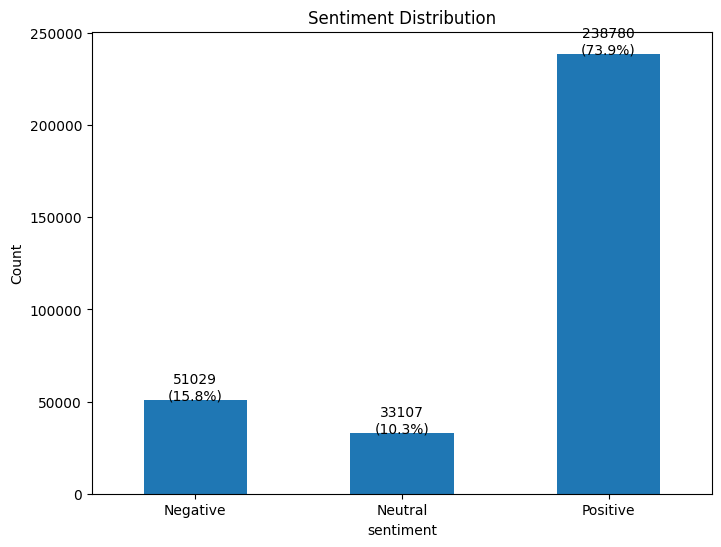

In [14]:
sentiment_counts = df['sentiment'].value_counts().sort_index()
percentages = sentiment_counts / sentiment_counts.sum() * 100

ax = sentiment_counts.plot(kind='bar', figsize=(8, 6))

for i, v in enumerate(sentiment_counts):
    ax.text(i, v, f'{v}\n({percentages[i]:.1f}%)', ha='center')

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=0)
ax.set_title('Sentiment Distribution')
ax.set_ylabel('Count')
plt.show()


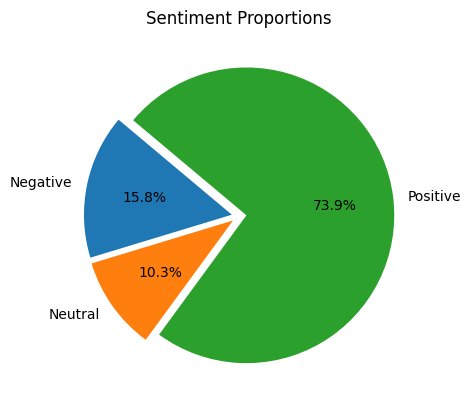

In [15]:
sentiment_counts = df['sentiment'].value_counts().sort_index()
plt.pie(
    sentiment_counts,
    labels=['Negative', 'Neutral', 'Positive'],
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.05, 0.05, 0.05)
)
plt.title('Sentiment Proportions')
plt.show()


In [16]:
per = df['sentiment'].value_counts() * 100 / len(df)

dict = {'Sentiment': ['Negative', 'Neutral', 'Positive'], 'Count': sentiment_counts, 'Percentage': per}
pd.DataFrame(dict)

,Sentiment,Count,Percentage
sentiment,,,
Negative,Negative,51029,15.802562
Neutral,Neutral,33107,10.252511
Positive,Positive,238780,73.944927


In [17]:
df['num_words'] = df['review_text'].apply(lambda x: len(x.split()))
df['num_chars'] = df['review_text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['review_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df[df['sentiment'] == 'Negative'][['num_words','num_chars','num_sentences']].describe()

,num_words,num_chars,num_sentences
count,51029.000000,51029.000000,51029.000000
mean,85.827490,98.163280,5.693468
std,93.127211,107.202796,5.336801
min,2.000000,2.000000,1.000000
25%,31.000000,35.000000,2.000000
50%,59.000000,68.000000,4.000000
75%,109.000000,125.000000,7.000000
max,3104.000000,3497.000000,161.000000


In [19]:
df[df['sentiment'] == 'Positive'][['num_words','num_chars','num_sentences']].describe()

,num_words,num_chars,num_sentences
count,238780.000000,238780.000000,238780.000000
mean,71.268251,81.308627,4.852550
std,97.211193,111.619900,5.333384
min,1.000000,1.000000,1.000000
25%,22.000000,25.000000,2.000000
50%,39.000000,45.000000,3.000000
75%,84.000000,95.000000,6.000000
max,3672.000000,4122.000000,204.000000


In [20]:
df[df['sentiment'] == 'Neutral'][['num_words','num_chars','num_sentences']].describe()

,num_words,num_chars,num_sentences
count,33107.000000,33107.000000,33107.000000
mean,91.878636,104.816323,5.596551
std,109.216125,125.691386,6.092161
min,2.000000,2.000000,1.000000
25%,29.000000,33.000000,2.000000
50%,57.000000,65.000000,4.000000
75%,114.000000,130.000000,7.000000
max,3596.000000,4279.000000,234.000000


<Axes: xlabel='num_words', ylabel='Count'>

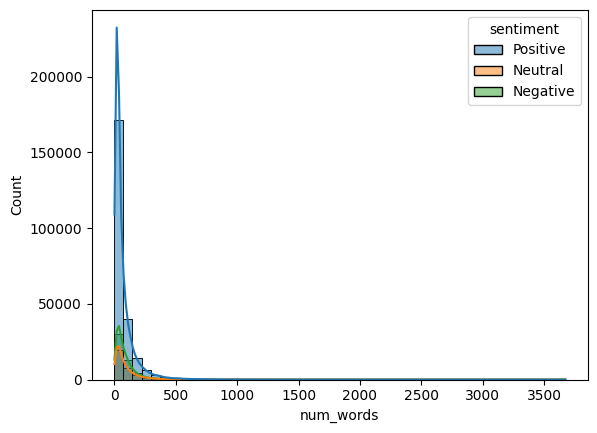

In [21]:
sns.histplot(data=df, x='num_words', hue='sentiment', bins=50, kde=True)

<Axes: xlabel='num_chars', ylabel='Count'>

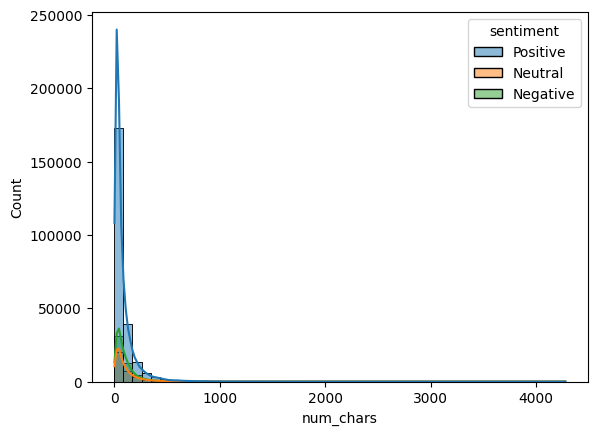

In [22]:
sns.histplot(data=df, x='num_chars', hue='sentiment', bins=50, kde=True)

<Axes: xlabel='num_sentences', ylabel='Count'>

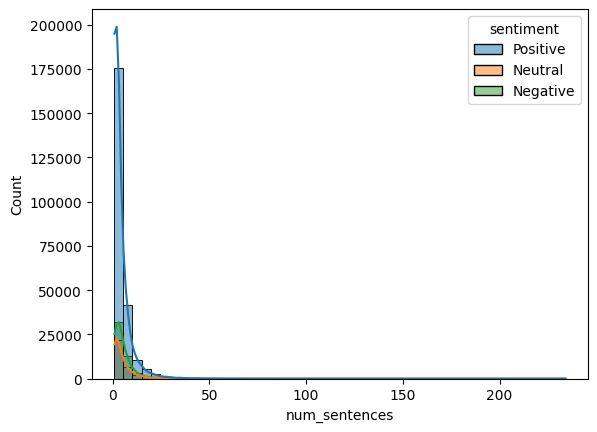

In [23]:
sns.histplot(data=df, x='num_sentences', hue='sentiment', bins=50, kde=True)

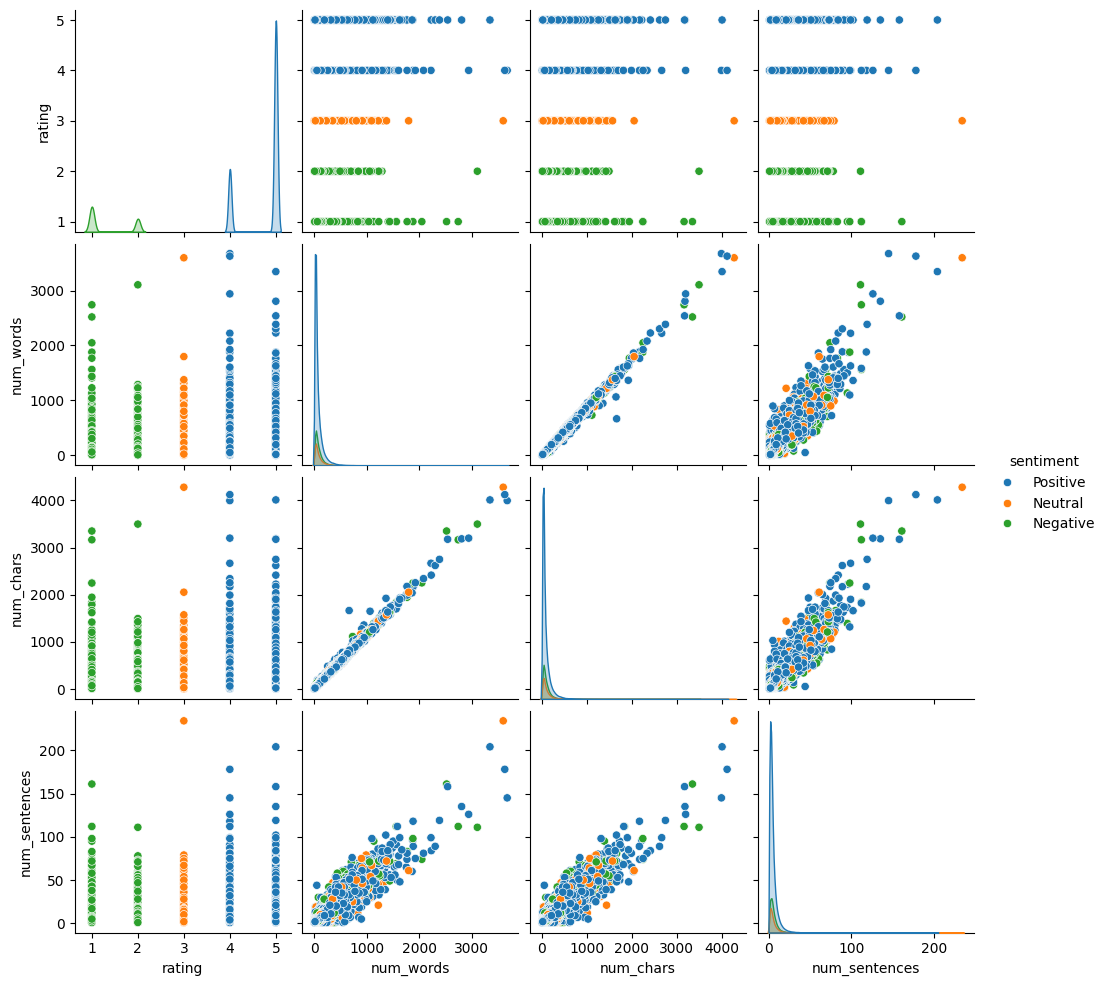

In [24]:
sns.pairplot(df, hue='sentiment')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'rating'),
  Text(0, 1.5, 'num_words'),
  Text(0, 2.5, 'num_chars'),
  Text(0, 3.5, 'num_sentences')])

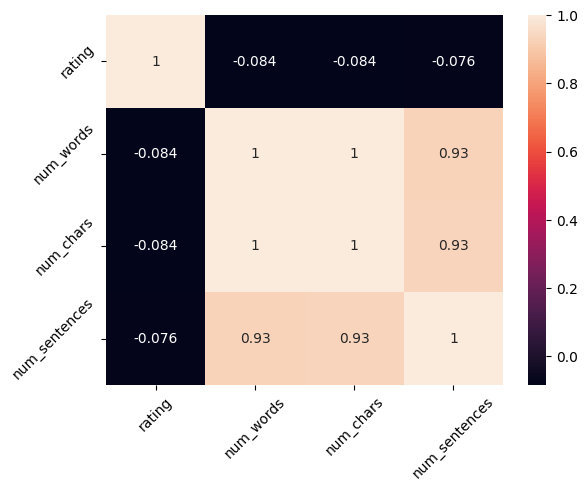

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [26]:
def transform_text(text):
    text = text.lower()

    words = re.findall(r'\b[a-z]+\b', text) # type: ignore
    
    stop_words = set(stopwords.words('english'))
    
    words = [word for word in words if word not in stop_words]
    
    return " ".join(words)

In [27]:
negative_reviews = df[df['sentiment'] == 'Negative']['review_text'].apply(transform_text) # type: ignore

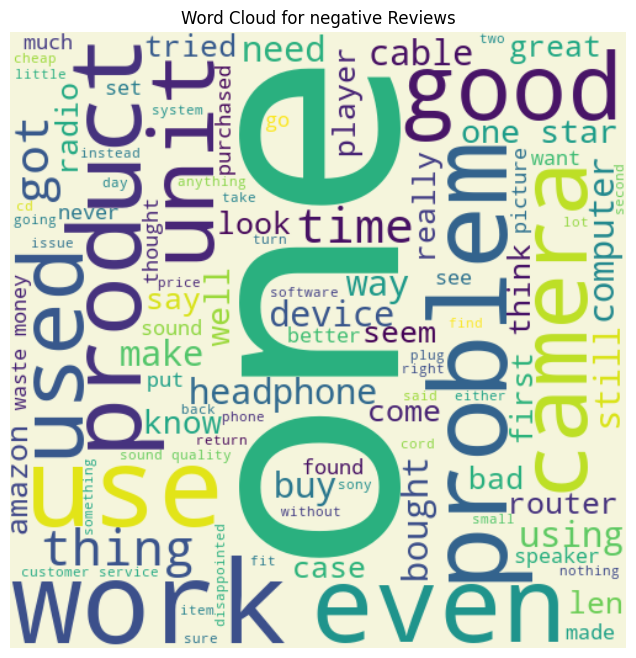

In [28]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='beige') # pyright: ignore[reportUndefinedVariable]
negative_wc = wc.generate(' '.join(negative_reviews))
plt.figure(figsize=(8, 8))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for negative Reviews')
plt.show()

In [29]:
neutral_reviews = df[df['sentiment'] == 'Neutral']['review_text'].apply(transform_text)

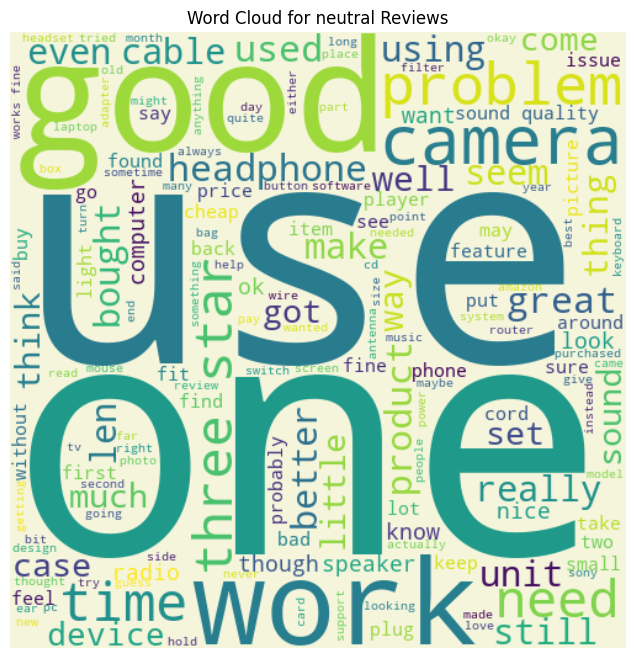

In [30]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='beige')
neutral_wc = wc.generate(' '.join(neutral_reviews))
plt.figure(figsize=(8, 8))
plt.imshow(neutral_wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for neutral Reviews')
plt.show()

In [31]:
positive_reviews = df[df['sentiment'] == 'Positive']['review_text'].apply(transform_text)

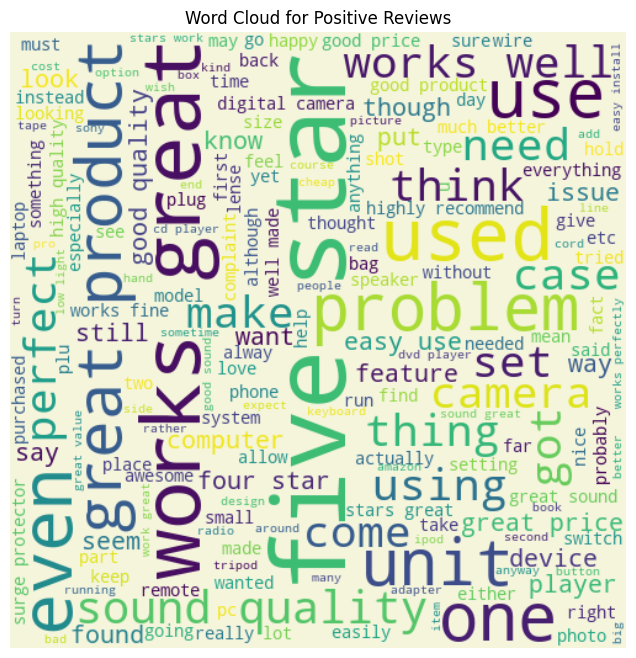

In [32]:
positive_wc = wc.generate(' '.join(positive_reviews))
plt.figure(figsize=(8, 8))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [33]:
positive_corpus = []

for review in positive_reviews:
    for word in review.split():
        positive_corpus.append(word)
        
positive_word_counts = Counter(positive_corpus)
most_common_positive_words = positive_word_counts.most_common(30)

In [34]:
most_common_positive_words_df = pd.DataFrame(most_common_positive_words, columns=['Word', 'Count'])

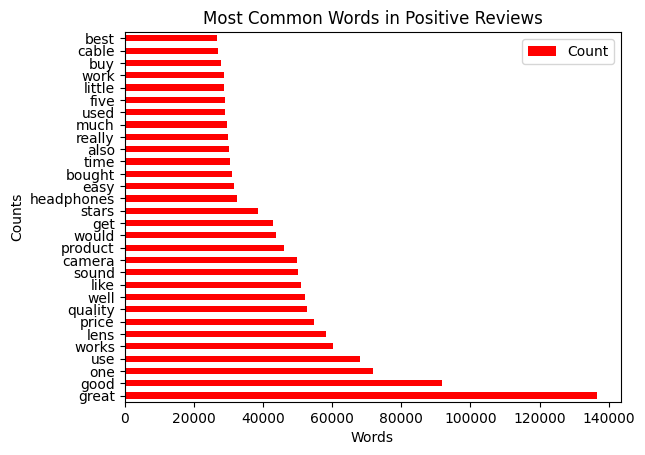

In [35]:
most_common_positive_words_df.plot.barh(x='Word', y='Count',color='red')

plt.title('Most Common Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()  

In [36]:
negative_corpus = []

for review in negative_reviews:
    for word in review.split():
        negative_corpus.append(word)
        
negative_word_counts = Counter(negative_corpus)
most_common_negative_words = negative_word_counts.most_common(30)

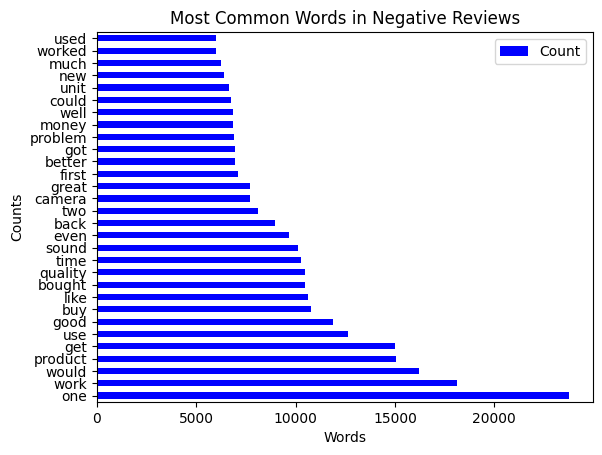

In [37]:
most_common_negative_words_df = pd.DataFrame(most_common_negative_words, columns=['Word', 'Count'])
most_common_negative_words_df.plot.barh(x='Word', y='Count', color='blue')
plt.title('Most Common Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [38]:
neutral_corpus = []

for review in neutral_reviews:
    for word in review.split():
        neutral_corpus.append(word)
        
neutral_word_counts = Counter(neutral_corpus)
most_common_neutral_words = neutral_word_counts.most_common(30)

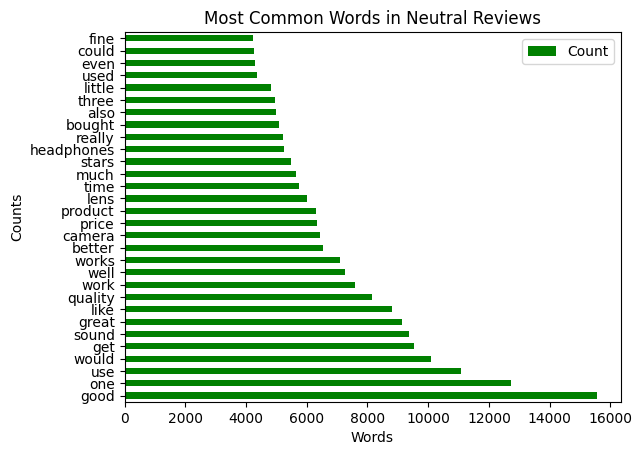

In [39]:
most_common_neutral_words_df = pd.DataFrame(most_common_neutral_words, columns=['Word', 'Count'])
most_common_neutral_words_df.plot.barh(x='Word', y='Count', color='green')
plt.title('Most Common Words in Neutral Reviews')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

Violin Plots: Text Metrics Distribution by Sentiment

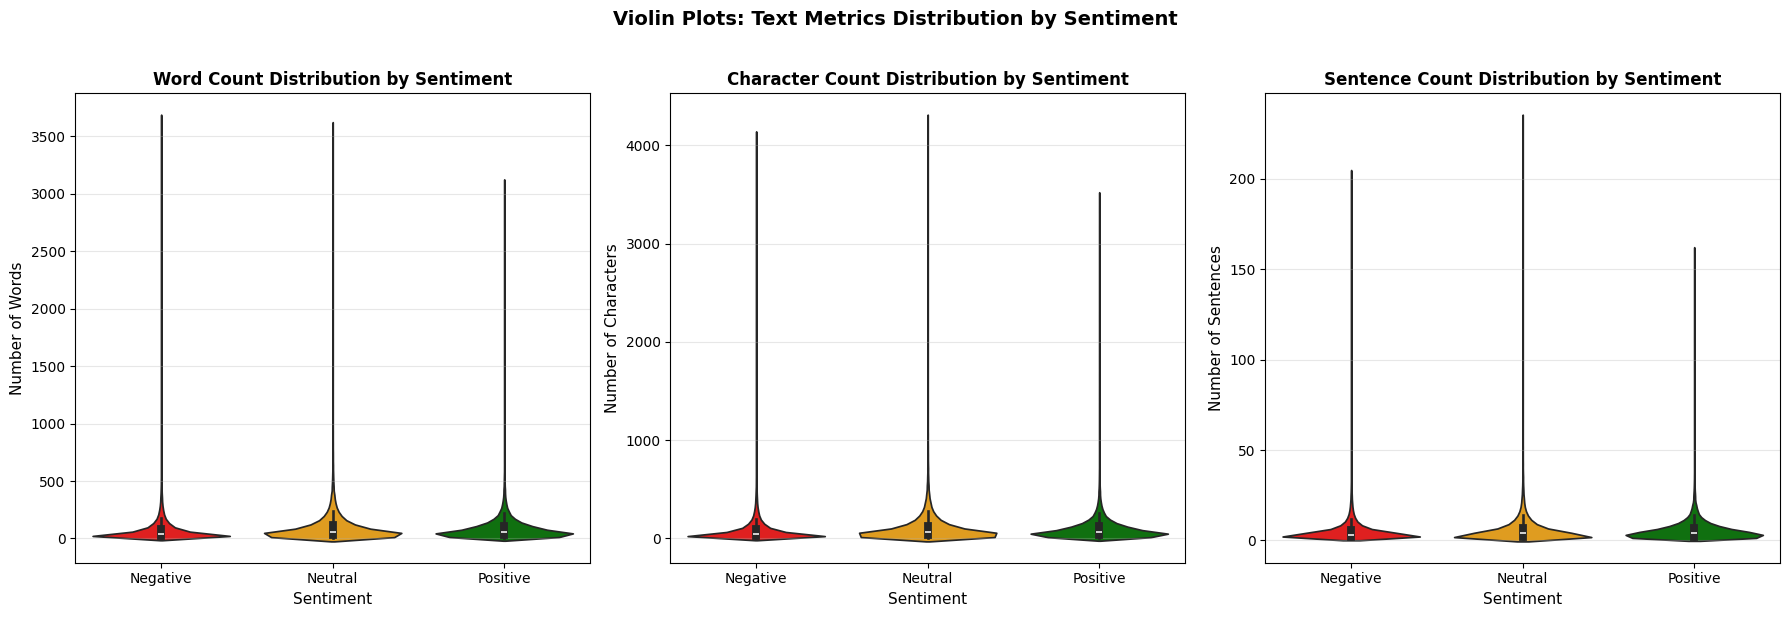

In [40]:
# Violin Plots: All Three Metrics in One Subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['red', 'orange', 'green']


#  words
sns.violinplot(x='sentiment', y='num_words', data=df, palette=colors, ax=axes[0])
axes[0].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[0].set_title('Word Count Distribution by Sentiment', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=11)
axes[0].set_ylabel('Number of Words', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

#  characters
sns.violinplot(x='sentiment', y='num_chars', data=df, palette=colors, ax=axes[1])
axes[1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[1].set_title('Character Count Distribution by Sentiment', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sentiment', fontsize=11)
axes[1].set_ylabel('Number of Characters', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

#  sentences
sns.violinplot(x='sentiment', y='num_sentences', data=df, palette=colors, ax=axes[2])
axes[2].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[2].set_title('Sentence Count Distribution by Sentiment', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Sentiment', fontsize=11)
axes[2].set_ylabel('Number of Sentences', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Violin Plots: Text Metrics Distribution by Sentiment', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Box Plots for All Metrics Side by Side

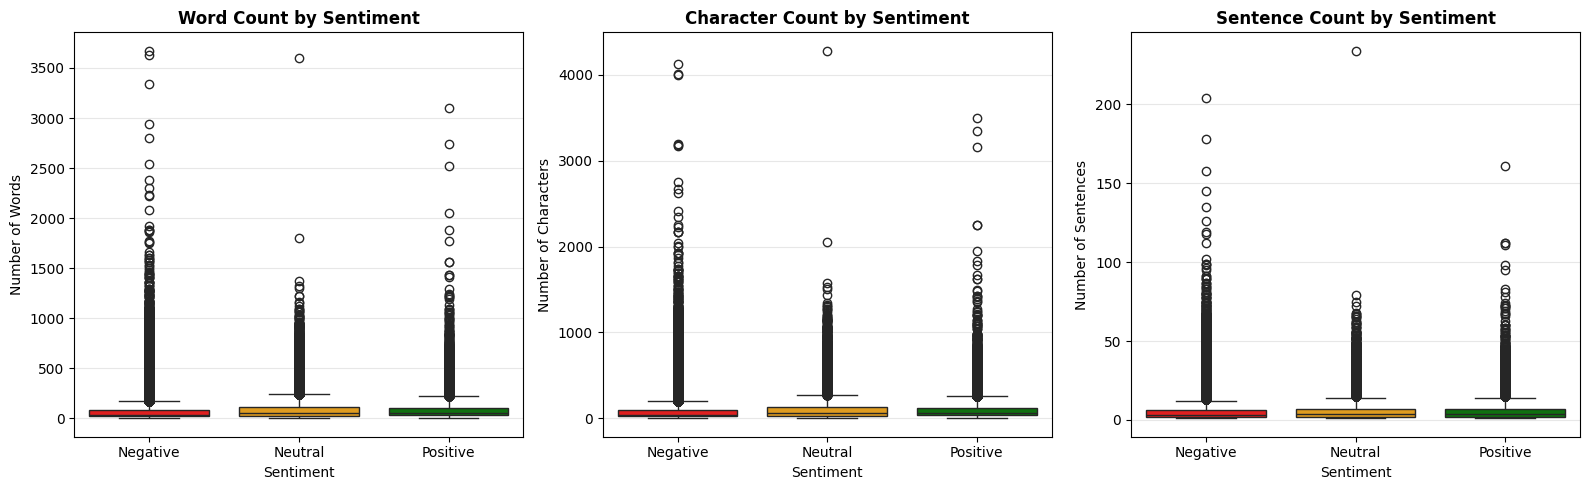

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
colors = ['red', 'orange', 'green']

# words
sns.boxplot(x='sentiment', y='num_words', data=df, palette=colors, ax=axes[0])
axes[0].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[0].set_title('Word Count by Sentiment', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Number of Words')
axes[0].grid(axis='y', alpha=0.3)

# characters
sns.boxplot(x='sentiment', y='num_chars', data=df, palette=colors, ax=axes[1])
axes[1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[1].set_title('Character Count by Sentiment', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Number of Characters')
axes[1].grid(axis='y', alpha=0.3)

# sentences
sns.boxplot(x='sentiment', y='num_sentences', data=df, palette=colors, ax=axes[2])
axes[2].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[2].set_title('Sentence Count by Sentiment', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Sentiment')
axes[2].set_ylabel('Number of Sentences')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Statistical Tests Analysis

In [42]:
from scipy.stats import chi2_contingency, f_oneway, ttest_ind


In [43]:
# Chi-Square Test: Sentiment vs Rating Independence
print("="*70)
print("CHI-SQUARE TEST: Sentiment vs Rating Independence")
print("="*70)
print("\nNull Hypothesis: Sentiment and Rating are independent")
print("Alternative Hypothesis: Sentiment and Rating are dependent (associated)\n")

# contingency table
contingency_table = pd.crosstab(df['sentiment'], df['rating'])
print("Contingency Table:")
print(contingency_table)
print()

# chi-square test
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of Freedom: {dof}")
print(f"\nSignificance Level: 0.05")

if p_value < 0.05:
    print(f"Result: REJECT null hypothesis (p-value = {p_value:.6f} < 0.05)")
    print("Conclusion: Sentiment and Rating are SIGNIFICANTLY associated")
else:
    print(f"Result: FAIL TO REJECT null hypothesis (p-value = {p_value:.6f} >= 0.05)")
    print("Conclusion: No significant association between Sentiment and Rating")

CHI-SQUARE TEST: Sentiment vs Rating Independence

Null Hypothesis: Sentiment and Rating are independent
Alternative Hypothesis: Sentiment and Rating are dependent (associated)

Contingency Table:
rating       1.0    2.0    3.0    4.0     5.0
sentiment                                    
Negative   33593  17436      0      0       0
Neutral        0      0  33107      0       0
Positive       0      0      0  54697  184083

Chi-Square Statistic: 645832.0000
P-value: 0.000000
Degrees of Freedom: 8

Significance Level: 0.05
Result: REJECT null hypothesis (p-value = 0.000000 < 0.05)
Conclusion: Sentiment and Rating are SIGNIFICANTLY associated


In [44]:
# ANOVA Test: Text Metrics (num_words, num_chars, num_sentences) across Sentiments
print("\n" + "="*70)
print("ANOVA TEST: Text Metrics across Sentiments")
print("="*70)
print("\nNull Hypothesis: Mean text metrics are equal across all sentiment groups")
print("Alternative Hypothesis: At least one sentiment group has different mean\n")

metrics = ['num_words', 'num_chars', 'num_sentences']
sentiments = df['sentiment'].unique()

results = {}

for metric in metrics:
    # Separate data by sentiment
    neg_data = df[df['sentiment'] == 'Negative'][metric]
    neu_data = df[df['sentiment'] == 'Neutral'][metric]
    pos_data = df[df['sentiment'] == 'Positive'][metric]
    
    # ANOVA
    f_stat, p_value_anova = f_oneway(neg_data, neu_data, pos_data)
    results[metric] = {'F-statistic': f_stat, 'p-value': p_value_anova}
    
    print(f"\n{metric.upper()}:")
    print(f"  Negative  - Mean: {neg_data.mean():.2f}, Std: {neg_data.std():.2f}")
    print(f"  Neutral   - Mean: {neu_data.mean():.2f}, Std: {neu_data.std():.2f}")
    print(f"  Positive  - Mean: {pos_data.mean():.2f}, Std: {pos_data.std():.2f}")
    print(f"  F-Statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value_anova:.6f}")
    
    if p_value_anova < 0.05:
        print(f"  Result: SIGNIFICANT difference (p-value = {p_value_anova:.6f} < 0.05)")
    else:
        print(f"  Result: NO significant difference (p-value = {p_value_anova:.6f} >= 0.05)")


ANOVA TEST: Text Metrics across Sentiments

Null Hypothesis: Mean text metrics are equal across all sentiment groups
Alternative Hypothesis: At least one sentiment group has different mean


NUM_WORDS:
  Negative  - Mean: 85.83, Std: 93.13
  Neutral   - Mean: 91.88, Std: 109.22
  Positive  - Mean: 71.27, Std: 97.21
  F-Statistic: 970.0813
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)

NUM_CHARS:
  Negative  - Mean: 98.16, Std: 107.20
  Neutral   - Mean: 104.82, Std: 125.69
  Positive  - Mean: 81.31, Std: 111.62
  F-Statistic: 967.6668
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)

NUM_SENTENCES:
  Negative  - Mean: 5.69, Std: 5.34
  Neutral   - Mean: 5.60, Std: 6.09
  Positive  - Mean: 4.85, Std: 5.33
  F-Statistic: 686.4982
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)


In [45]:
# Independent T-Tests: Pairwise comparisons for num_words between sentiment groups
print("\n" + "="*70)
print("INDEPENDENT T-TESTS: Pairwise Comparisons (num_words)")
print("="*70)

neg_words = df[df['sentiment'] == 'Negative']['num_words']
neu_words = df[df['sentiment'] == 'Neutral']['num_words']
pos_words = df[df['sentiment'] == 'Positive']['num_words']

comparisons = [
    ('Negative vs Neutral', neg_words, neu_words),
    ('Negative vs Positive', neg_words, pos_words),
    ('Neutral vs Positive', neu_words, pos_words)
]

print("\nNull Hypothesis: Mean word counts are equal between groups")
print("Alternative Hypothesis: Mean word counts differ between groups\n")

for comparison_name, group1, group2 in comparisons:
    t_stat, p_val = ttest_ind(group1, group2)
    mean_diff = group1.mean() - group2.mean()
    
    print(f"{comparison_name}:")
    print(f"  Group 1 Mean: {group1.mean():.2f}, Group 2 Mean: {group2.mean():.2f}")
    print(f"  Mean Difference: {mean_diff:.2f}")
    print(f"  T-Statistic: {t_stat:.4f}")
    print(f"  P-value: {p_val:.6f}")
    
    if p_val < 0.05:
        print(f"  Result: SIGNIFICANT difference (p-value = {p_val:.6f} < 0.05)")
    else:
        print(f"  Result: NO significant difference (p-value = {p_val:.6f} >= 0.05)")
    print()


INDEPENDENT T-TESTS: Pairwise Comparisons (num_words)

Null Hypothesis: Mean word counts are equal between groups
Alternative Hypothesis: Mean word counts differ between groups

Negative vs Neutral:
  Group 1 Mean: 85.83, Group 2 Mean: 91.88
  Mean Difference: -6.05
  T-Statistic: -8.5946
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)

Negative vs Positive:
  Group 1 Mean: 85.83, Group 2 Mean: 71.27
  Mean Difference: 14.56
  T-Statistic: 30.9344
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)

Neutral vs Positive:
  Group 1 Mean: 91.88, Group 2 Mean: 71.27
  Mean Difference: 20.61
  T-Statistic: 35.5885
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)



In [72]:
# T-Tests for Rating across Sentiments
print("="*70)
print("INDEPENDENT T-TESTS: Rating Comparisons")
print("="*70)

neg_rating = df[df['sentiment'] == 'Negative']['rating']
neu_rating = df[df['sentiment'] == 'Neutral']['rating']
pos_rating = df[df['sentiment'] == 'Positive']['rating']

rating_comparisons = [
    ('Negative vs Neutral', neg_rating, neu_rating),
    ('Negative vs Positive', neg_rating, pos_rating),
    ('Neutral vs Positive', neu_rating, pos_rating)
]

print("\nNull Hypothesis: Mean ratings are equal between groups")
print("Alternative Hypothesis: Mean ratings differ between groups\n")

for comparison_name, group1, group2 in rating_comparisons:
    t_stat, p_val = ttest_ind(group1, group2)
    mean_diff = group1.mean() - group2.mean()
    
    print(f"{comparison_name}:")
    print(f"  Group 1 Mean: {group1.mean():.2f}, Group 2 Mean: {group2.mean():.2f}")
    print(f"  Mean Difference: {mean_diff:.2f}")
    print(f"  T-Statistic: {t_stat:.4f}")
    print(f"  P-value: {p_val:.6f}")
    
    if p_val < 0.05:
        print(f"  Result: SIGNIFICANT difference (p-value = {p_val:.6f} < 0.05)")
    else:
        print(f"  Result: NO significant difference (p-value = {p_val:.6f} >= 0.05)")
    print()

print("="*70)

INDEPENDENT T-TESTS: Rating Comparisons

Null Hypothesis: Mean ratings are equal between groups
Alternative Hypothesis: Mean ratings differ between groups

Negative vs Neutral:
  Group 1 Mean: 1.34, Group 2 Mean: 3.00
  Mean Difference: -1.66
  T-Statistic: -636.1949
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)

Negative vs Positive:
  Group 1 Mean: 1.34, Group 2 Mean: 4.77
  Mean Difference: -3.43
  T-Statistic: -1634.3151
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)

Neutral vs Positive:
  Group 1 Mean: 3.00, Group 2 Mean: 4.77
  Mean Difference: -1.77
  T-Statistic: -766.7776
  P-value: 0.000000
  Result: SIGNIFICANT difference (p-value = 0.000000 < 0.05)



## Text Analysis

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [48]:
def transform_text(text):
    text = text.lower()
    words = re.findall(r'\b[a-z]+\b', text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [49]:
from nltk.util import ngrams

all_reviews = df['review_text'].dropna().apply(transform_text)

# Tokenize all words
all_tokens = []
for text in all_reviews:
    all_tokens.extend(text.split())

# Bigrams and trigrams
bigrams = list(ngrams(all_tokens, 2))
trigrams = list(ngrams(all_tokens, 3))

bigram_counts = Counter(bigrams).most_common(20)
trigram_counts = Counter(trigrams).most_common(20)

bigram_df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Count'])
trigram_df = pd.DataFrame(trigram_counts, columns=['Trigram', 'Count'])

print("Top 20 Bigrams:")
print(bigram_df)

print("\nTop 20 Trigrams:")
print(trigram_df)

Top 20 Bigrams:
                 Bigram  Count
0         (five, stars)  27393
1        (works, great)  18267
2      (sound, quality)  13744
3      (great, product)  10030
4         (works, well)  10017
5           (easy, use)   8215
6        (great, price)   7996
7    (would, recommend)   7219
8       (good, quality)   6860
9         (works, fine)   6203
10        (four, stars)   6195
11  (highly, recommend)   6108
12       (much, better)   5740
13      (good, product)   5648
14        (good, price)   5619
15       (great, sound)   5258
16      (high, quality)   4690
17        (dvd, player)   4477
18    (digital, camera)   4338
19       (stars, great)   4333

Top 20 Trigrams:
                           Trigram  Count
0             (five, stars, great)   3645
1             (five, stars, works)   2247
2              (five, stars, good)   1962
3       (would, recommend, anyone)   1245
4       (would, highly, recommend)   1223
5           (sound, quality, good)   1223
6          (great, pr

In [50]:
# POS tagging: most common adjectives by sentiment

def extract_adjectives(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    return [word.lower() for word, tag in tagged if tag.startswith('JJ')]

adj_by_sentiment = {}

for sentiment in ['Negative', 'Neutral', 'Positive']:
    texts = df[df['sentiment'] == sentiment]['review_text'].fillna('').head(2000)  # limit for speed
    adjectives = []
    for t in texts:
        adjectives.extend(extract_adjectives(t))
    adj_by_sentiment[sentiment] = Counter(adjectives).most_common(20)

for sentiment, adj_list in adj_by_sentiment.items():
    print(f"\nTop Adjectives in {sentiment} Reviews:")
    print(pd.DataFrame(adj_list, columns=['Adjective', 'Count']))


Top Adjectives in Negative Reviews:
    Adjective  Count
0           i   1139
1        good    458
2       other    328
3       great    267
4        same    238
5         new    230
6         bad    223
7        more    223
8       first    191
9        poor    174
10     better    165
11        few    160
12       much    145
13      cheap    141
14       fine    136
15  different    123
16       many    121
17     little    121
18        old    119
19       last    116

Top Adjectives in Neutral Reviews:
   Adjective  Count
0          i   1097
1       good    930
2      great    567
3      other    351
4     better    274
5     little    249
6       fine    229
7       more    210
8        bad    195
9       same    189
10      nice    187
11       new    179
12     small    175
13     cheap    168
14      much    166
15       few    147
16      easy    144
17      best    143
18        ok    135
19       old    132

Top Adjectives in Positive Reviews:
    Adjective  Count
0       

Average punctuation usage by sentiment:
           exclamation  question  ellipsis
sentiment                                 
Negative      0.606048  0.141390  0.328245
Neutral       0.248860  0.115776  0.316217
Positive      0.619026  0.062514  0.201018


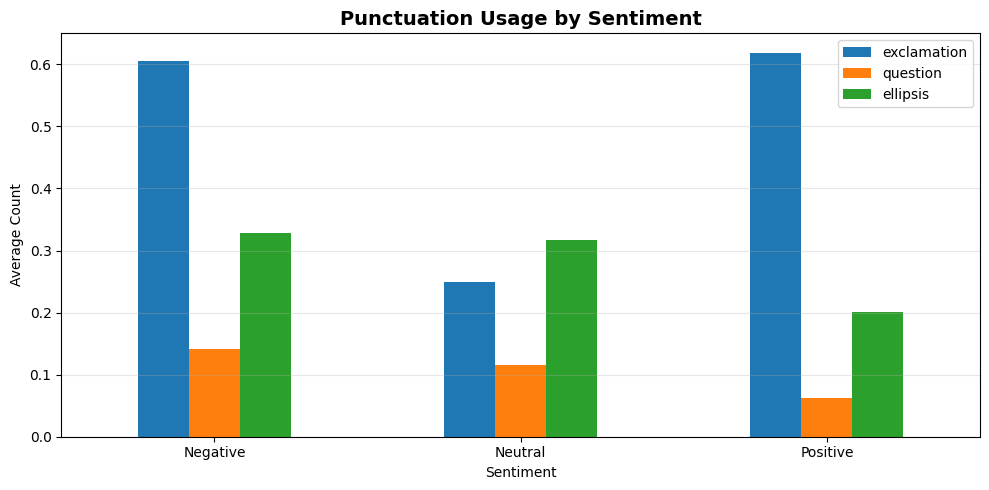

In [51]:
# Punctuation analysis by sentiment

def punctuation_stats(text):
    return {
        'exclamation': text.count('!'),
        'question': text.count('?'),
        'ellipsis': text.count('...'),
    }

punct_df = df['review_text'].fillna('').apply(punctuation_stats).apply(pd.Series)
punct_df['sentiment'] = df['sentiment']

punct_summary = punct_df.groupby('sentiment')[['exclamation', 'question', 'ellipsis']].mean()
print("Average punctuation usage by sentiment:")
print(punct_summary)

punct_summary.plot(kind='bar', figsize=(10, 5))
plt.title('Punctuation Usage by Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Average Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

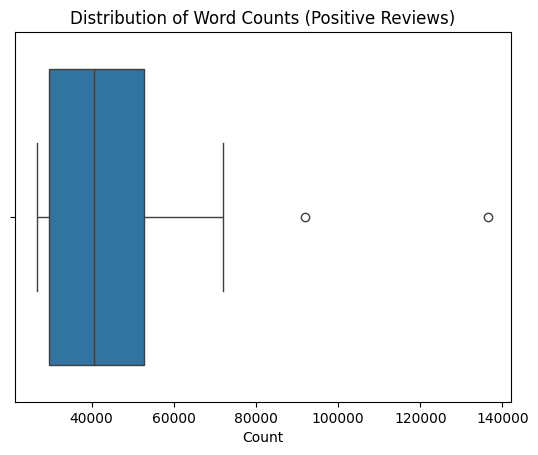

In [52]:
sns.boxplot(x='Count', data=most_common_positive_words_df)
plt.title('Distribution of Word Counts (Positive Reviews)')
plt.show()

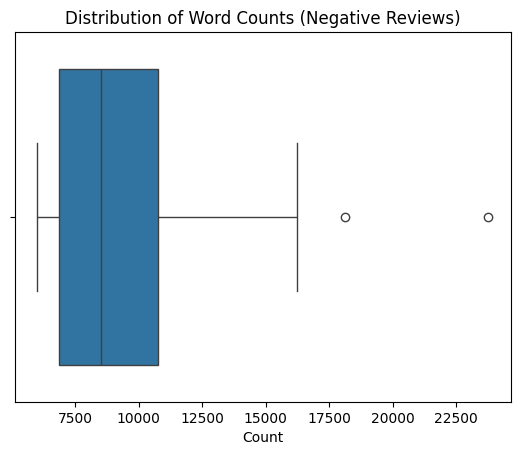

In [53]:
sns.boxplot(x='Count', data=most_common_negative_words_df)
plt.title('Distribution of Word Counts (Negative Reviews)')
plt.show()

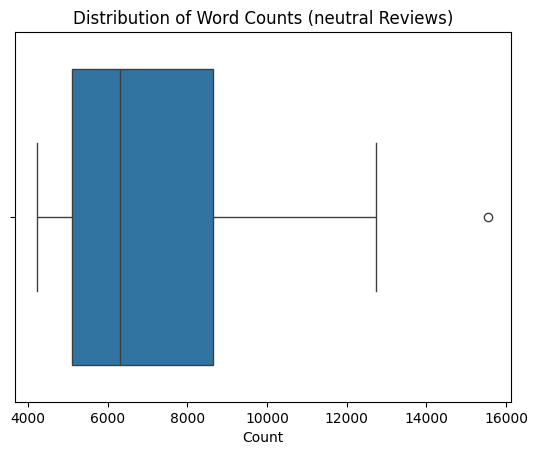

In [54]:
sns.boxplot(x='Count', data=most_common_neutral_words_df)
plt.title('Distribution of Word Counts (neutral Reviews)')
plt.show()

## Outlier Detection

In [55]:
# Outlier detection using IQR method for word count

Q1 = df['num_words'].quantile(0.25)
Q3 = df['num_words'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = df[df['num_words'] < lower_bound]
outliers_high = df[df['num_words'] > upper_bound]

print("="*70)
print("OUTLIER DETECTION: Word Count")
print("="*70)
print(f"\nQ1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"\nReviews with EXTREMELY LOW word count: {len(outliers_low)} ({len(outliers_low)/len(df)*100:.2f}%)")
print(f"Reviews with EXTREMELY HIGH word count: {len(outliers_high)} ({len(outliers_high)/len(df)*100:.2f}%)")




OUTLIER DETECTION: Word Count

Q1 (25th percentile): 23.0
Q3 (75th percentile): 92.0
IQR: 69.0
Lower bound: -80.5
Upper bound: 195.5

Reviews with EXTREMELY LOW word count: 0 (0.00%)
Reviews with EXTREMELY HIGH word count: 25472 (7.89%)


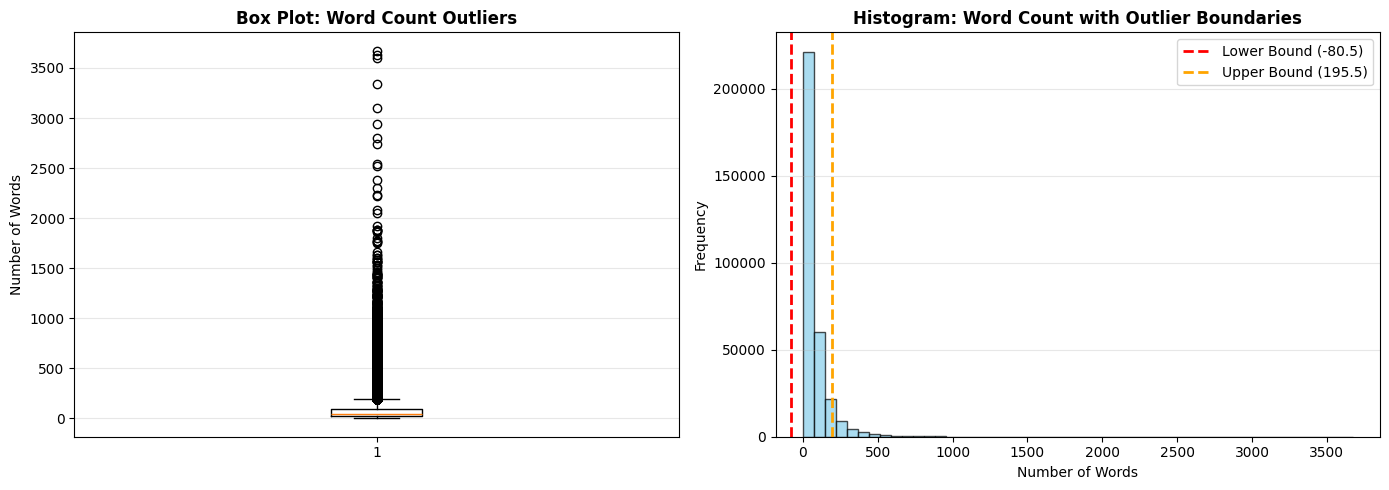

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot showing outliers
axes[0].boxplot(df['num_words'], vert=True)
axes[0].set_ylabel('Number of Words')
axes[0].set_title('Box Plot: Word Count Outliers', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Histogram with outlier boundaries
axes[1].hist(df['num_words'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound ({lower_bound:.1f})')
axes[1].axvline(upper_bound, color='orange', linestyle='--', linewidth=2, label=f'Upper Bound ({upper_bound:.1f})')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram: Word Count with Outlier Boundaries', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [57]:
# Unusual patterns: Short reviews with high ratings

short_reviews = df[df['num_words'] <= 10] 

print("="*70)
print("UNUSUAL PATTERNS: Short Reviews (≤10 words)")
print("="*70)
print(f"\nTotal short reviews: {len(short_reviews)} ({len(short_reviews)/len(df)*100:.2f}%)")


short_by_rating = short_reviews['rating'].value_counts().sort_index()

print("\nShort reviews by rating:")

for rating, count in short_by_rating.items():
    pct = count / len(short_reviews) * 100
    print(f"  Rating {rating}: {count} ({pct:.1f}%)")

# Short reviews by sentiment
short_by_sentiment = short_reviews['sentiment'].value_counts()

print("\nShort reviews by sentiment:")

for sentiment, count in short_by_sentiment.items():
    pct = count / len(short_reviews) * 100
    print(f"  {sentiment}: {count} ({pct:.1f}%)")


UNUSUAL PATTERNS: Short Reviews (≤10 words)

Total short reviews: 36301 (11.24%)

Short reviews by rating:
  Rating 1.0: 2226 (6.1%)
  Rating 2.0: 979 (2.7%)
  Rating 3.0: 2492 (6.9%)
  Rating 4.0: 4911 (13.5%)
  Rating 5.0: 25693 (70.8%)

Short reviews by sentiment:
  Positive: 30604 (84.3%)
  Negative: 3205 (8.8%)
  Neutral: 2492 (6.9%)


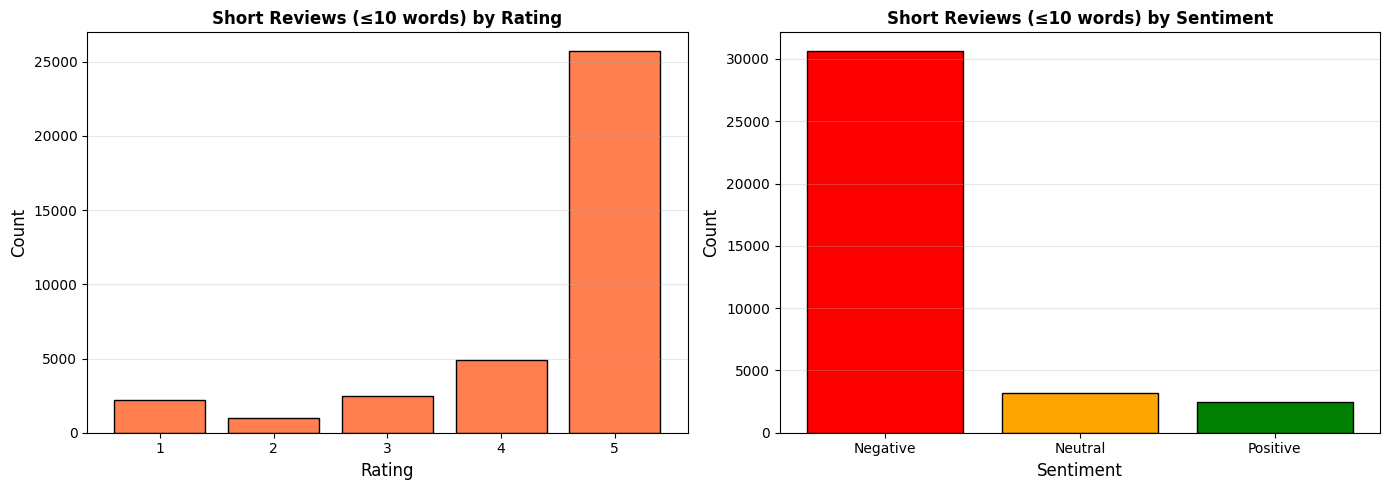

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: short reviews by rating
axes[0].bar(short_by_rating.index, short_by_rating.values, color='coral', edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Short Reviews (≤10 words) by Rating', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Bar chart: short reviews by sentiment
colors_sent = ['red', 'orange', 'green']
axes[1].bar(range(len(short_by_sentiment)), short_by_sentiment.values, 
            tick_label=['Negative', 'Neutral', 'Positive'], color=colors_sent, edgecolor='black')
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Short Reviews (≤10 words) by Sentiment', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


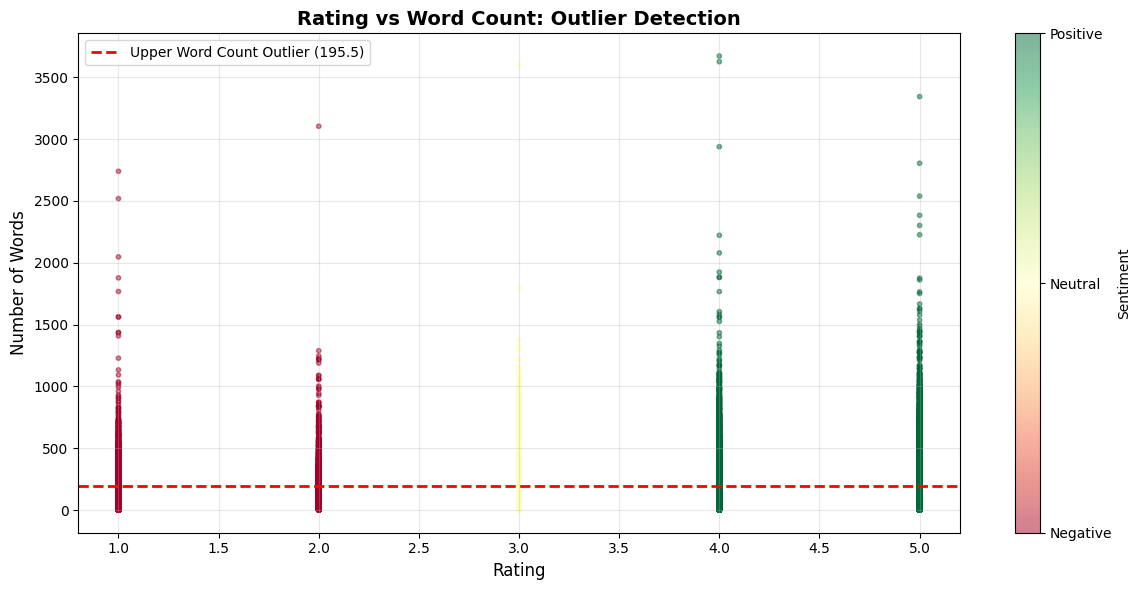


Reviews above upper bound (195.5 words) by rating:
  Rating 1.0: 2455 reviews
  Rating 2.0: 1860 reviews
  Rating 3.0: 3638 reviews
  Rating 4.0: 6008 reviews
  Rating 5.0: 11511 reviews


In [59]:
# Scatter plot: Rating vs Word Count (identifying outliers)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['rating'], df['num_words'], 
                     c=df['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2}),
                     cmap='RdYlGn', alpha=0.5, s=10)

# outlier boundaries
plt.axhline(upper_bound, color='red', linestyle='--', linewidth=2, 
            label=f'Upper Word Count Outlier ({upper_bound:.1f})')

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.title('Rating vs Word Count: Outlier Detection', fontweight='bold', fontsize=14)
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_label('Sentiment')
cbar.ax.set_yticklabels(['Negative', 'Neutral', 'Positive'])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nReviews above upper bound ({upper_bound:.1f} words) by rating:")
high_outliers_by_rating = outliers_high['rating'].value_counts().sort_index()
for rating, count in high_outliers_by_rating.items():
    print(f"  Rating {rating}: {count} reviews")

## Review Length Analysis

In [60]:
# average word length per review
df['avg_word_length'] = df['review_text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)


def categorize_length(num_words):
    if num_words <= 10:
        return 'Very Short'
    elif num_words <= 50:
        return 'Short'
    elif num_words <= 150:
        return 'Medium'
    elif num_words <= 300:
        return 'Long'
    else:
        return 'Very Long'

df['length_category'] = df['num_words'].apply(categorize_length)

print("="*70)
print("REVIEW LENGTH ANALYSIS")
print("="*70)

# Average word length by sentiment
avg_length_by_sentiment = df.groupby('sentiment')['avg_word_length'].agg(['mean', 'std', 'min', 'max'])
print("\nAverage word length by sentiment:")
print(avg_length_by_sentiment)

# Review length categories distribution
length_dist = df['length_category'].value_counts()
order = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
length_dist = length_dist.reindex([cat for cat in order if cat in length_dist.index])

print("\nReview length category distribution:")
print(length_dist)


REVIEW LENGTH ANALYSIS

Average word length by sentiment:
               mean       std       min    max
sentiment                                     
Negative   4.401122  0.454702  2.000000  12.75
Neutral    4.378665  0.459990  2.000000  10.00
Positive   4.497049  0.560686  1.333333  26.75

Review length category distribution:
length_category
Very Short     36301
Short         142312
Medium        104162
Long           29699
Very Long      10442
Name: count, dtype: int64


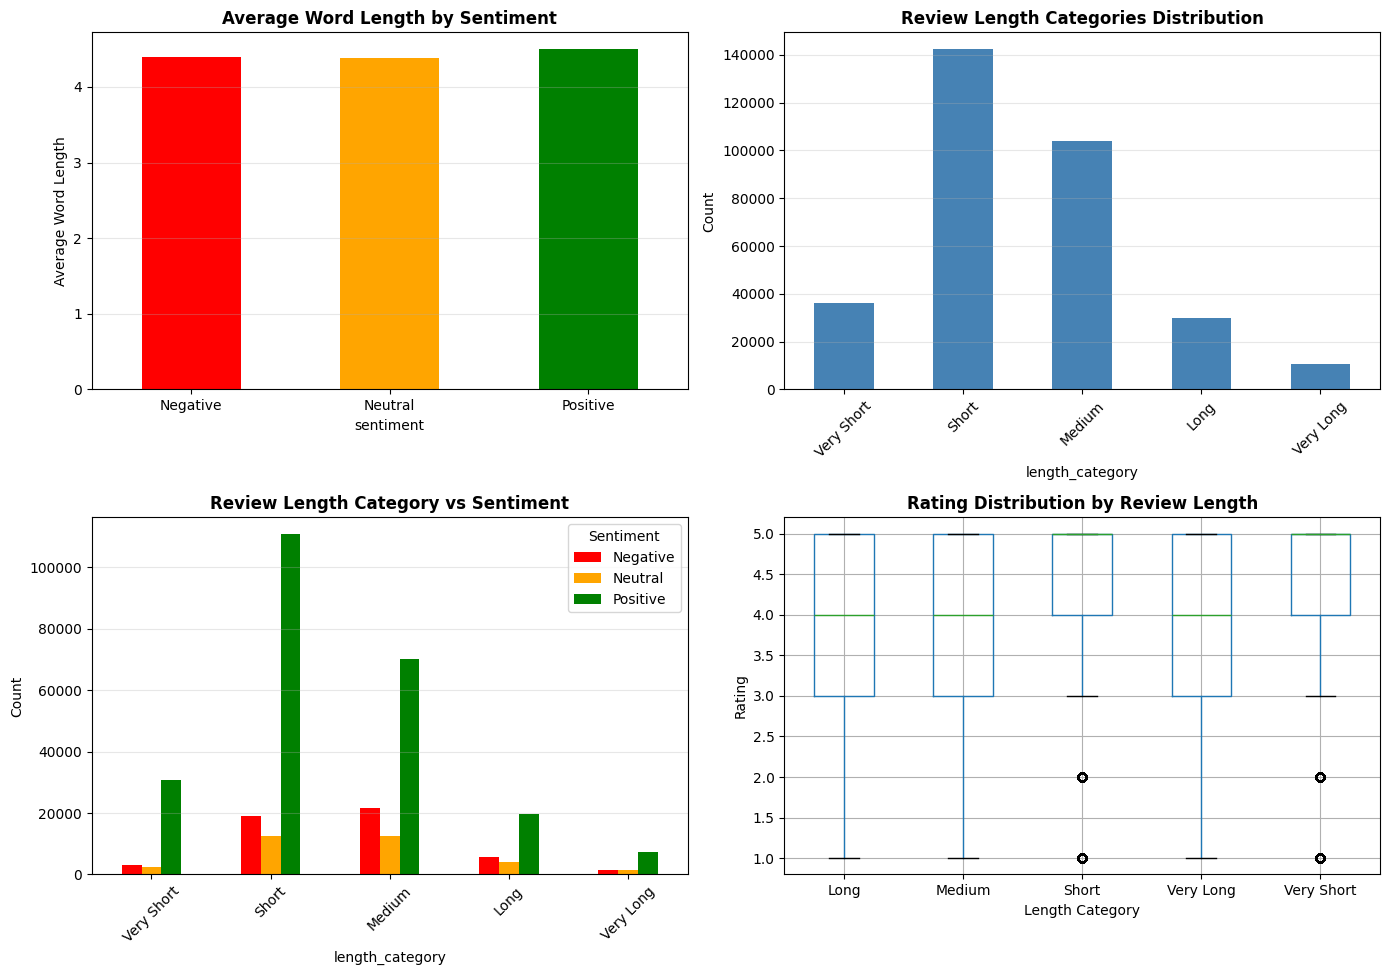

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Average word length by sentiment
avg_length_by_sentiment['mean'].plot(kind='bar', ax=axes[0, 0], color=['red', 'orange', 'green'])
axes[0, 0].set_title('Average Word Length by Sentiment', fontweight='bold')
axes[0, 0].set_ylabel('Average Word Length')
axes[0, 0].set_xticklabels(['Negative', 'Neutral', 'Positive'], rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# Length categories distribution
length_dist.plot(kind='bar', ax=axes[0, 1], color='steelblue')
axes[0, 1].set_title('Review Length Categories Distribution', fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Length category vs Sentiment
length_sentiment_crosstab = pd.crosstab(df['length_category'], df['sentiment'])
length_sentiment_crosstab.reindex([cat for cat in order if cat in length_sentiment_crosstab.index]).plot(
    kind='bar', ax=axes[1, 0], color=['red', 'orange', 'green'])
axes[1, 0].set_title('Review Length Category vs Sentiment', fontweight='bold')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
axes[1, 0].grid(axis='y', alpha=0.3)

# Length category vs Rating
df.boxplot(column='rating', by='length_category', ax=axes[1, 1])
axes[1, 1].set_title('Rating Distribution by Review Length', fontweight='bold')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].set_xlabel('Length Category')
plt.suptitle('')

plt.tight_layout()
plt.show()

## Specific Word Analysis

In [62]:
# Most discriminative words for each sentiment (TF-IDF)

def get_discriminative_words(sentiment_name, df_input):
    sent_text = df_input[df_input['sentiment'] == sentiment_name]['review_text'].apply(transform_text)
    other_text = df_input[df_input['sentiment'] != sentiment_name]['review_text'].apply(transform_text)
    
    sent_words = Counter()
    other_words = Counter()
    
    for text in sent_text:
        sent_words.update(text.split())
    for text in other_text:
        other_words.update(text.split())
    
    # Calculate discriminative score
    discriminative = {}
    for word, count in sent_words.items():
        if count >= 5:  # minimum threshold
            other_count = other_words.get(word, 0)
            ratio = count / (1 + other_count)  # To avoid division by zero
            discriminative[word] = ratio
    
    return sorted(discriminative.items(), key=lambda x: x[1], reverse=True)[:15]

print("="*70)
print("DISCRIMINATIVE WORDS BY SENTIMENT")
print("="*70)

for sentiment in ['Negative', 'Neutral', 'Positive']:
    disc_words = get_discriminative_words(sentiment, df)
    print(f"\nTop words distinctive to {sentiment} sentiment:")
    for word, score in disc_words:
        print(f"  {word}: {score:.2f}")

# Negation words
negations = ['not', 'no', 'never', 'neither', 'nobody', 'nothing', 
            'nowhere', 'neither', 'cannot', "can't", "won't", 
            "isn't", "doesn't", "didn't"
            ]

def count_negations(text):
    text_lower = text.lower()
    return sum(1 for neg in negations if neg in text_lower)

df['negation_count'] = df['review_text'].apply(count_negations)

print("\n" + "="*70)
print("NEGATION WORDS ANALYSIS")
print("="*70)

negation_by_sentiment = df.groupby('sentiment')['negation_count'].agg(['mean', 'std', 'min', 'max'])
print("\nAverage negation words by sentiment:")
print(negation_by_sentiment)


DISCRIMINATIVE WORDS BY SENTIMENT

Top words distinctive to Negative sentiment:
  heinlein: 13.00
  imelda: 12.00
  joshua: 10.29
  unethical: 10.00
  planetarium: 10.00
  lara: 9.50
  warrentee: 9.00
  sharon: 8.17
  cabletech: 7.00
  systemic: 7.00
  ineligible: 7.00
  reecom: 7.00
  reflectance: 7.00
  serwen: 7.00
  cont: 7.00

Top words distinctive to Neutral sentiment:
  tftpboot: 11.00
  ela: 11.00
  telbook: 11.00
  imon: 10.00
  linex: 9.00
  livewire: 8.00
  shmirsky: 8.00
  ultimatetvs: 8.00
  biomorph: 7.00
  erics: 6.00
  cathair: 6.00
  sidetone: 6.00
  pappalardo: 6.00
  partitian: 6.00
  keybinds: 6.00

Top words distinctive to Positive sentiment:
  excelente: 92.67
  excelent: 46.38
  ava: 42.33
  tucks: 41.00
  emap: 40.00
  lam: 40.00
  headshots: 39.00
  leer: 37.00
  compra: 36.00
  gus: 36.00
  astronomers: 35.00
  zoombrowser: 35.00
  corvette: 35.00
  korg: 34.00
  sonido: 33.00

NEGATION WORDS ANALYSIS

Average negation words by sentiment:
               mean  

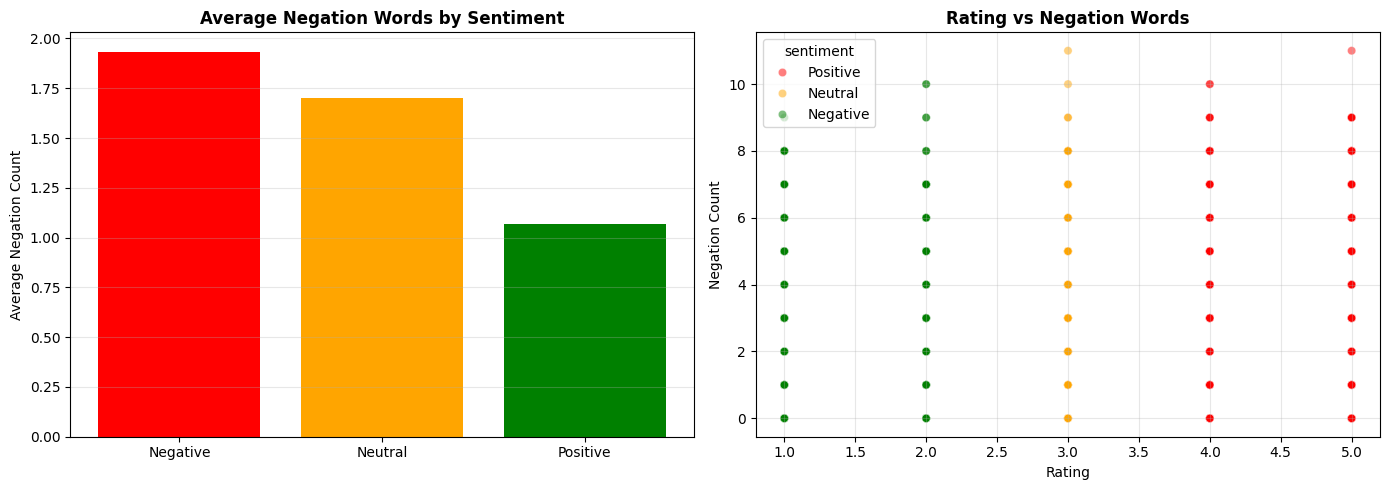

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Negation usage by sentiment
negation_means = df.groupby('sentiment')['negation_count'].mean()
axes[0].bar(['Negative', 'Neutral', 'Positive'], negation_means.values, color=['red', 'orange', 'green'])
axes[0].set_title('Average Negation Words by Sentiment', fontweight='bold')
axes[0].set_ylabel('Average Negation Count')
axes[0].grid(axis='y', alpha=0.3)

# Negation vs Rating
sns.scatterplot(x='rating', y='negation_count', data=df, hue='sentiment', 
                palette=['red', 'orange', 'green'], alpha=0.5, ax=axes[1])
axes[1].set_title('Rating vs Negation Words', fontweight='bold')
axes[1].set_ylabel('Negation Count')
axes[1].set_xlabel('Rating')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Cross-Tabulation Tables

In [64]:
rating_sentiment_pct = pd.crosstab(df['rating'], df['sentiment'], normalize='index') * 100


print("\n" + "="*70)
print("CROSS-TABULATION: Review Length Category × Sentiment")
print("="*70)

length_sentiment_crosstab = pd.crosstab(df['length_category'], df['sentiment'], margins=True)
print("\nCount:")
print(length_sentiment_crosstab)

length_sentiment_pct = pd.crosstab(df['length_category'], df['sentiment'], normalize='index') * 100
print("\nPercentage (%):")
print(length_sentiment_pct.round(2))



CROSS-TABULATION: Review Length Category × Sentiment

Count:
sentiment        Negative  Neutral  Positive     All
length_category                                     
Long                 5830     4093     19776   29699
Medium              21523    12434     70205  104162
Short               18948    12581    110783  142312
Very Long            1523     1507      7412   10442
Very Short           3205     2492     30604   36301
All                 51029    33107    238780  322916

Percentage (%):
sentiment        Negative  Neutral  Positive
length_category                             
Long                19.63    13.78     66.59
Medium              20.66    11.94     67.40
Short               13.31     8.84     77.85
Very Long           14.59    14.43     70.98
Very Short           8.83     6.86     84.31


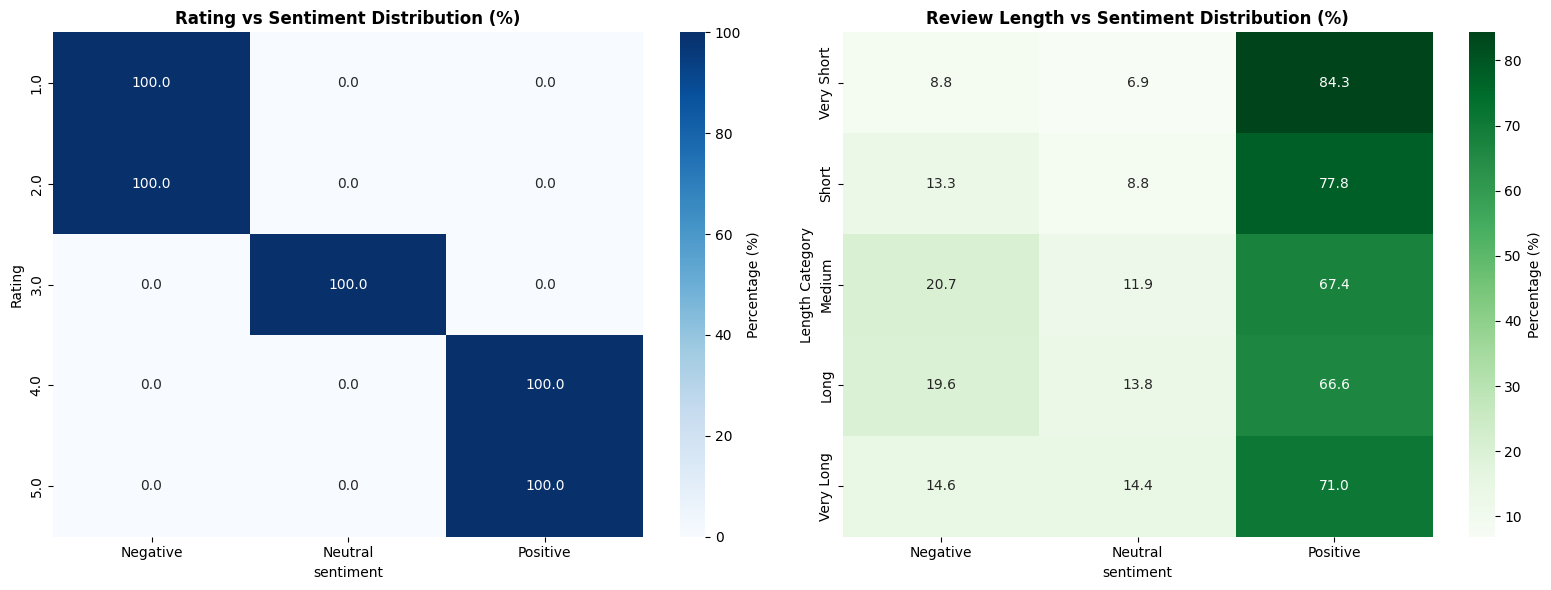

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap: Rating × Sentiment (normalized)
sns.heatmap(rating_sentiment_pct, annot=True, fmt='.1f', cmap='Blues', 
            ax=axes[0], cbar_kws={'label': 'Percentage (%)'})
axes[0].set_title('Rating vs Sentiment Distribution (%)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Rating')

# Heatmap: Length × Sentiment (normalized)
length_sent_display = pd.crosstab(df['length_category'], df['sentiment'], normalize='index') * 100
length_sent_display = length_sent_display.reindex(['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
sns.heatmap(length_sent_display, annot=True, fmt='.1f', cmap='Greens', 
            ax=axes[1], cbar_kws={'label': 'Percentage (%)'})
axes[1].set_title('Review Length vs Sentiment Distribution (%)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Length Category')

plt.tight_layout()
plt.show()

## Feature Engineering for Machine Learning

In [66]:
# 1. Lexical Diversity: unique words / total words
df['lexical_diversity'] = df['review_text'].apply(
    lambda x: len(set(x.lower().split())) / len(x.split()) if len(x.split()) > 0 else 0
)

# 3. Digit ratio: digits / total characters
df['digit_ratio'] = df['review_text'].apply(
    lambda x: sum(1 for c in x if c.isdigit()) / len(x) if len(x) > 0 else 0
)

# 4. Special character ratio
df['special_char_ratio'] = df['review_text'].apply(
    lambda x: sum(1 for c in x if not c.isalnum() and not c.isspace()) / len(x) if len(x) > 0 else 0
)

ml_features = ['lexical_diversity', 'digit_ratio', 'special_char_ratio', 'avg_word_length', 'negation_count']

In [67]:
print(df[ml_features].describe().round(3))

       lexical_diversity  digit_ratio  special_char_ratio  avg_word_length  \
count         322916.000   322916.000          322916.000       322916.000   
mean               0.803        0.006               0.031            4.470   
std                0.132        0.011               0.019            0.538   
min                0.033        0.000               0.000            1.333   
25%                0.705        0.000               0.021            4.143   
50%                0.804        0.000               0.028            4.405   
75%                0.909        0.007               0.037            4.710   
max                1.000        0.544               0.831           26.750   

       negation_count  
count      322916.000  
mean            1.271  
std             1.267  
min             0.000  
25%             0.000  
50%             1.000  
75%             2.000  
max            11.000  


In [68]:
for feature in ml_features:
    print(f"\n{feature}:")
    print(df.groupby('sentiment')[feature].agg(['mean', 'std']).round(3))


lexical_diversity:
            mean    std
sentiment              
Negative   0.779  0.123
Neutral    0.773  0.131
Positive   0.812  0.133

digit_ratio:
            mean    std
sentiment              
Negative   0.006  0.011
Neutral    0.005  0.010
Positive   0.005  0.011

special_char_ratio:
            mean    std
sentiment              
Negative   0.031  0.018
Neutral    0.030  0.017
Positive   0.030  0.020

avg_word_length:
            mean    std
sentiment              
Negative   4.401  0.455
Neutral    4.379  0.460
Positive   4.497  0.561

negation_count:
            mean    std
sentiment              
Negative   1.934  1.230
Neutral    1.701  1.275
Positive   1.069  1.209


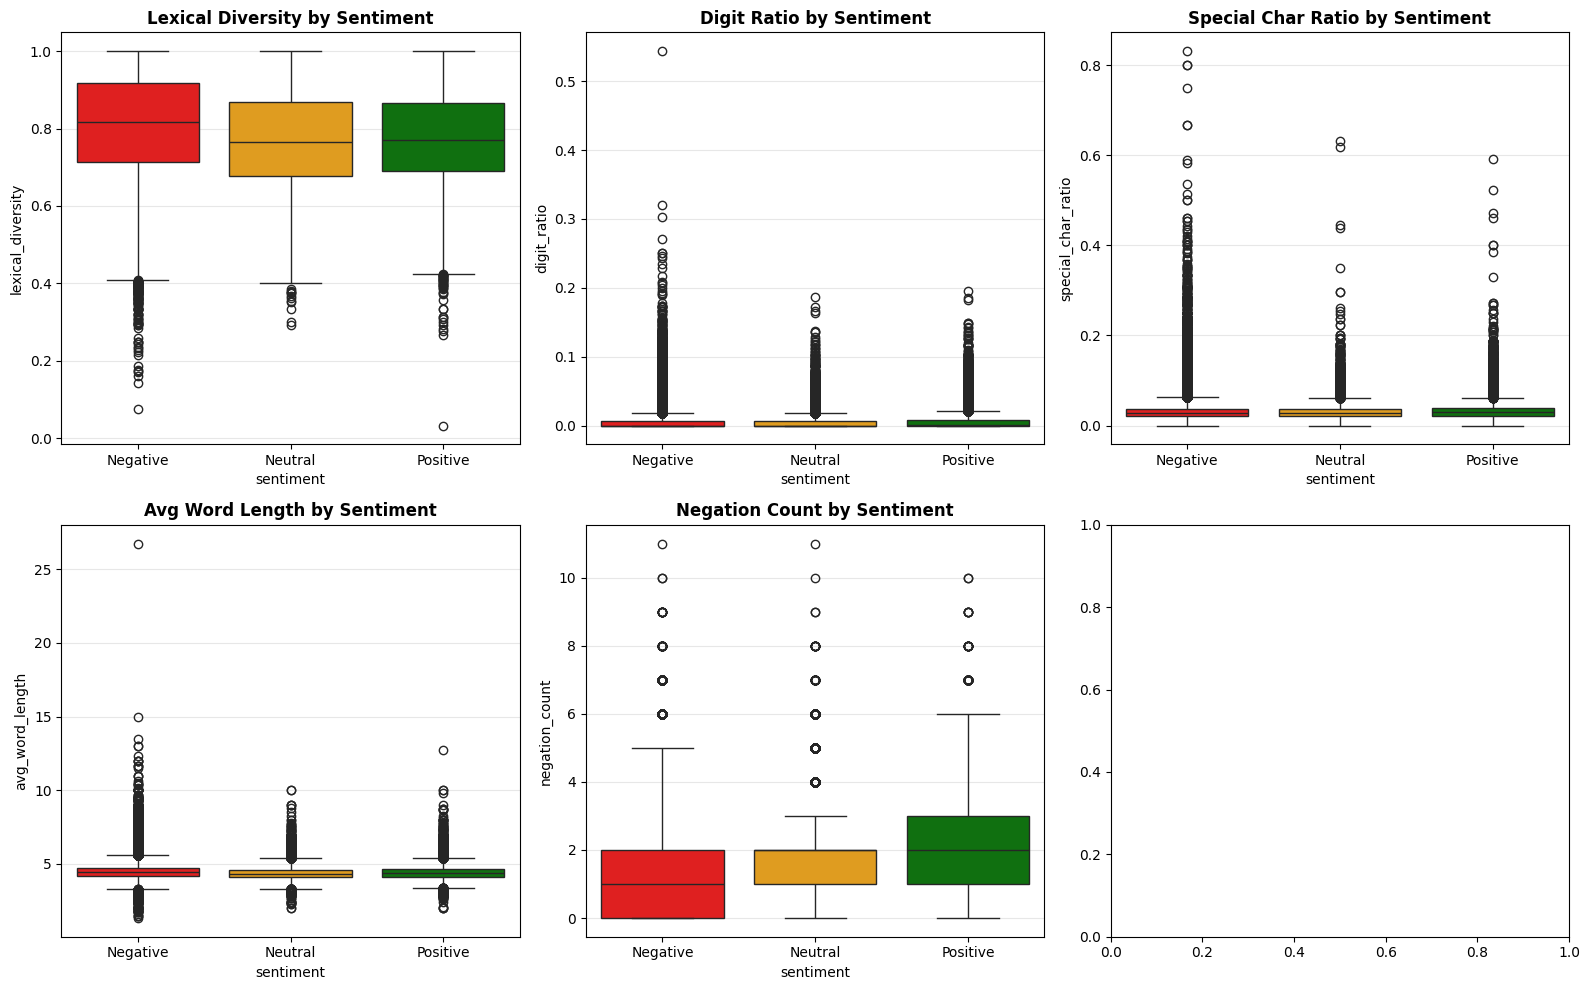

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

colors = ['red', 'orange', 'green']

for idx, feature in enumerate(ml_features):
    sns.boxplot(x='sentiment', y=feature, data=df, palette=colors, ax=axes[idx])
    axes[idx].set_title(f'{feature.replace("_", " ").title()} by Sentiment', fontweight='bold')
    axes[idx].set_xticklabels(['Negative', 'Neutral', 'Positive'])
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [70]:

# Correlation with sentiment (encoded)
sentiment_encoded = df['sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
correlation_data = df[ml_features].copy()
correlation_data['sentiment_encoded'] = sentiment_encoded

correlations = correlation_data.corr()['sentiment_encoded'].sort_values(ascending=False)



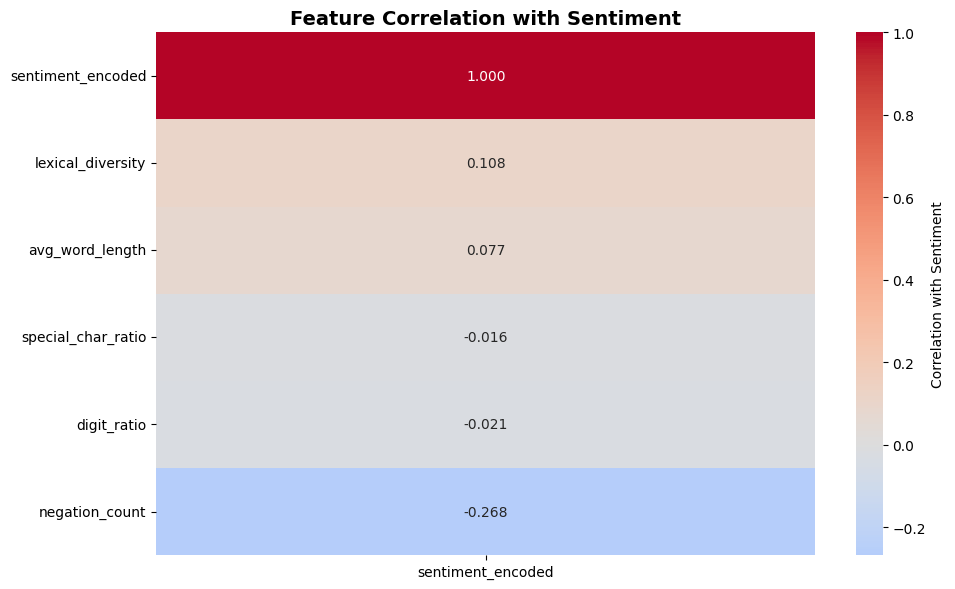

In [71]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlations.to_frame(), annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            cbar_kws={'label': 'Correlation with Sentiment'})
plt.title('Feature Correlation with Sentiment', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [74]:
df.to_csv('enhanced_reviews_dataset.csv', index=False)